<a href="https://colab.research.google.com/github/AykanIpek/fast-food-sales-analysis/blob/main/Data_Exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
conn = sqlite3.connect('/content/Fast-FoodDB.db')
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS menu_items;")
cursor.execute("""
CREATE TABLE IF NOT EXISTS menu_items (
    MenuItemId INTEGER PRIMARY KEY,
    MenuItemName TEXT,
    MenuItemDescription TEXT,
    PLU INTEGER,
    RecipeId INTEGER
);
""")

cursor.execute("DROP TABLE IF EXISTS store_restaurant;")
cursor.execute("""
CREATE TABLE IF NOT EXISTS store_restaurant (
    STORE_NUMBER TEXT PRIMARY KEY,
    STORE_ADDRESS1 TEXT,
    STORE_ADDRESS2 TEXT,
    DISTRIBUTION_REGION TEXT,
    STORE_STATE TEXT,
    STORE_ZIP TEXT,
    STORE_TYPE TEXT,
    STORE_CITY TEXT
);
""")

cursor.execute("DROP TABLE IF EXISTS pos_ordersale;")
cursor.execute("""
CREATE TABLE pos_ordersale (
    MD5KEY_ORDERSALE TEXT PRIMARY KEY,
    ChangeReceived REAL,
    OrderNumber INTEGER,
    TaxInclusiveAmount REAL,
    TaxAmount REAL,
    MealLocation INTEGER,
    TransactionId INTEGER,
    StoreNumber TEXT,
    date DATE
);
""")

cursor.execute("DROP TABLE IF EXISTS menuitem;")
cursor.execute("DROP TABLE IF EXISTS menuitem;")
cursor.execute("""
CREATE TABLE menuitem (
    MD5KEY_MENUITEM TEXT PRIMARY KEY,
    MD5KEY_ORDERSALE TEXT,
    StoreNumber TEXT,
    date DATE,
    TaxInclusiveAmount REAL,
    TaxAmount REAL,
    AdjustedPrice REAL,
    DiscountAmount REAL,
    Price REAL,
    Quantity INTEGER,
    PLU INTEGER,
    CategoryDescription TEXT,
    DepartmentDescription TEXT,
    Description TEXT,
    Id INTEGER
);
""")

conn.commit()


menu_items_df = pd.read_csv('/content/drive/MyDrive/Data Science Proje 2/Fast-Food Restaurant Chain/menu_items.csv')
menu_items_df.to_sql('menu_items', conn, if_exists='append', index=False)

store_restaurant_df = pd.read_csv('/content/drive/MyDrive/Data Science Proje 2/Fast-Food Restaurant Chain/store_restaurant.csv')
store_restaurant_df.to_sql('store_restaurant', conn, if_exists='replace', index=False)

pos_ordersale_df = pd.read_csv('/content/drive/MyDrive/Data Science Proje 2/Fast-Food Restaurant Chain/pos_ordersale.csv')
pos_ordersale_df.to_sql('pos_ordersale', conn, if_exists='replace', index=False)

menuitem_df = pd.read_csv('/content/drive/MyDrive/Data Science Proje 2/Fast-Food Restaurant Chain/menuitem.csv')
menuitem_df.to_sql('menuitem', conn, if_exists='replace', index=False)


df = pd.read_sql("SELECT * FROM store_restaurant LIMIT 5;", conn)
conn.close()

df.head()


,STORE_ADDRESS1,STORE_ADDRESS2,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,STORE_LOYALTY_FLAG,STORE_NUMBER
0,Ninth Street,,Western,California,Berkeley,94710,Traditional,N,46673
1,Shattuck Sq,Shop #6,Western,California,Berkeley,94704,Traditional,Y,4904
2,Myrtle Avenue,,Northeast,New York,Ridgewood,11385,Traditional,Y,12631
3,Whitney Avenue,,Northeast,New York,Elmhurst,11373,Traditional,Y,20974


In [ ]:
conn = sqlite3.connect('/content/Fast-FoodDB.db')

df1 = pd.read_sql("SELECT * FROM menu_items",conn)
df1

,MenuItemId,MenuItemName,MenuItemDescription,PLU,RecipeId
0,1,FtL/Ham,Ham FtLong,111000004,6
1,2,Six/Ham,Ham 6 inch,121000004,7
2,3,FfB/Ham,Ham FtFbd,112000004,2
3,4,fBd/Ham,Ham FlatBd,122000004,8
4,5,Sld/Ham,Ham Salad,131000004,9
...,...,...,...,...,...
8000,10563,adF/TkyItl,Turkey Italiano AddFt,174000731,9309
8001,10565,dm6/TkyItl,Turkey Italiano Extr6,172000731,9311
8002,10567,ad6/TkyItl,Turkey Italiano Add6in,175000731,9313
8003,10569,#NAME?,Turkey Italiano Portn,173000731,9315


In [ ]:
df2 = pd.read_sql("SELECT * FROM menuitem",conn)
df2

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong,46673,0,0.6975,7.75,0.00,7.75,1,111000041,326,15-03-05
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,46673,0,0.1530,1.70,0.00,1.70,1,212000126,280,15-03-05
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch,12631,0,0.3230,3.64,0.61,4.25,1,121000008,8,15-03-05
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch,12631,0,0.3328,3.75,0.00,3.75,1,121000001,91,15-03-05
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in,12631,0,0.0443,0.50,0.00,0.50,1,175000062,564,15-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,FF8D9C582D9D56B98033132538E0020A,C1FC597609722C265C130E692875AF96,Chips,Chips,Chips,4904,0,0.0000,0.95,0.25,1.20,1,311000100,277,15-06-15
91427,FFAA204DCDF43F43ADF7BD6AFCFEAC7A,6328756C8846E3534E92659812D54C64,6 Inch,6 Inch Sub,Cold Cut Combo 6 inch,4904,0,0.0000,4.00,0.00,4.00,1,121000005,44,15-06-15
91428,FFAD36E06711249D447DCD96121F21CC,32A10A584840FC7DBED1818459A24919,Footlong,Footlong Sub,Cold Cut Combo FtLong,4904,0,0.4496,5.29,0.21,5.50,1,111000005,43,15-06-15
91429,FFD5DCAFF2286B45901E4EA8F1928646,D56C9748DFA6D3672EAB8AFA1B9E17AE,Footlong,Footlong Sub,Spicy Italian FtLong,12631,0,0.4881,5.50,0.00,5.50,1,111000002,69,15-06-15


In [ ]:
df3 = pd.read_sql("SELECT * FROM pos_ordersale",conn)
df3

,MD5KEY_ORDERSALE,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,MealLocation,TransactionId,StoreNumber,date
0,00BCB738A1F814DB960C25012E9913DF,0.00,67,0,0.56,0,67,46673,15-03-05
1,03438C257BC2DD0037F35EC8BFC0C8E2,3.46,39,0,0.54,0,39,12631,15-03-05
2,04AEF56CF3130AC1EFAD41C470F5245D,0.00,81,0,0.69,0,79,46673,15-03-05
3,04BBFAD4E73C30EE2EC3B4E52509637C,0.00,159,0,1.16,0,159,12631,15-03-05
4,061AE382DC127057E8ADBBF869CFB361,0.00,51,0,0.00,0,51,12631,15-03-05
...,...,...,...,...,...,...,...,...,...
43223,FBEFF26C8C626C303C191A42C8CCFBDA,0.00,8014,0,1.58,0,8014,20974,15-06-15
43224,FC277A831486F1ADD27AE22FF2BDF559,0.03,15972,0,0.47,0,15972,4904,15-06-15
43225,FD23743074BCCB6E0847269D09F458AE,0.00,16014,0,0.00,1,16014,4904,15-06-15
43226,FD570797AC0A9AFC3953A30EC5355829,0.00,7149,0,0.00,1,7149,46673,15-06-15


In [ ]:
query = """
SELECT
 ms.MenuItemId,
 ms.MenuItemName,
 mi.TaxAmount,
 mi.AdjustedPrice,
 mi.DiscountAmount,
 mi.Price,
 mi.Quantity,
 mi.date,
 po.MealLocation,
 po.TransactionId,
 sr.STORE_NUMBER,
 sr.STORE_STATE,
 sr.STORE_TYPE
FROM  menuitem AS mi
JOIN menu_items AS ms
ON mi.PLU = ms.PLU AND mi.Id = ms.MenuItemId
JOIN pos_ordersale AS po
ON mi.MD5KEY_ORDERSALE = po.MD5KEY_ORDERSALE
JOIN store_restaurant AS sr
ON mi.StoreNumber = sr.STORE_NUMBER;
"""

df4 = pd.read_sql(query,conn)
df4

,MenuItemId,MenuItemName,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,date,MealLocation,TransactionId,STORE_NUMBER,STORE_STATE,STORE_TYPE
0,326,FtL/ChxStr,0.6975,7.75,0.00,7.75,1,15-03-05,0,87,46673,California,Traditional
1,280,21oz21CDrk,0.1530,1.70,0.00,1.70,1,15-03-05,1,80,46673,California,Traditional
2,8,Six/B.M.T.,0.3230,3.64,0.61,4.25,1,15-03-05,0,98,12631,New York,Traditional
3,91,Six/Veggie,0.3328,3.75,0.00,3.75,1,15-03-05,0,45,12631,New York,Traditional
4,564,ad6/Avocad,0.0443,0.50,0.00,0.50,1,15-03-05,0,108,12631,New York,Traditional
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,277,Chp/Chips,0.0000,0.95,0.25,1.20,1,15-06-15,1,16106,4904,California,Traditional
91427,44,Six/CCTrio,0.0000,4.00,0.00,4.00,1,15-06-15,1,16016,4904,California,Traditional
91428,43,FtL/CCTrio,0.4496,5.29,0.21,5.50,1,15-06-15,0,16061,4904,California,Traditional
91429,69,FtL/Spicy,0.4881,5.50,0.00,5.50,1,15-06-15,0,12121,12631,New York,Traditional


In [ ]:
conn.close()

In [ ]:
df4.shape

(91431, 13)

In [ ]:
df4["Revenue"] = df4['AdjustedPrice'] * df4["Quantity"]

In [ ]:
df4.head(10)

,MenuItemId,MenuItemName,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,date,MealLocation,TransactionId,STORE_NUMBER,STORE_STATE,STORE_TYPE,Revenue
0,326,FtL/ChxStr,0.6975,7.75,0.00,7.75,1,15-03-05,0,87,46673,California,Traditional,7.75
1,280,21oz21CDrk,0.1530,1.70,0.00,1.70,1,15-03-05,1,80,46673,California,Traditional,1.70
2,8,Six/B.M.T.,0.3230,3.64,0.61,4.25,1,15-03-05,0,98,12631,New York,Traditional,3.64
3,91,Six/Veggie,0.3328,3.75,0.00,3.75,1,15-03-05,0,45,12631,New York,Traditional,3.75
4,564,ad6/Avocad,0.0443,0.50,0.00,0.50,1,15-03-05,0,108,12631,New York,Traditional,0.50
5,13,Six/Turkey,0.3519,3.91,1.34,5.25,1,15-03-05,0,86,46673,California,Traditional,3.91
6,69,FtL/Spicy,0.4881,5.50,0.00,5.50,1,15-03-05,0,88,12631,New York,Traditional,5.50
7,279,Btl/BtCDrk,0.1553,1.75,0.00,1.75,1,15-03-05,0,132,12631,New York,Traditional,1.75
8,34,Six/ChxTry,0.3301,3.72,0.78,4.50,1,15-03-05,0,16,12631,New York,Traditional,3.72
9,2,Six/Ham,0.3328,3.75,0.00,3.75,1,15-03-05,0,152,12631,New York,Traditional,3.75


In [ ]:
daily_revenue1 = (
    df4.groupby(["date", "STORE_NUMBER", "STORE_STATE", "STORE_TYPE"], as_index=False)
       .agg({"Revenue": "sum"})
)

daily_revenue1.rename(columns={"Revenue": "Daily-Revenue"}, inplace=True)


daily_revenue1["date"] = pd.to_datetime(daily_revenue1["date"], format='%y-%m-%d')
daily_revenue1["day"] = daily_revenue1["date"].dt.day
daily_revenue1["month"] = daily_revenue1["date"].dt.month
daily_revenue1["date_numeric"] = daily_revenue1["date"].astype("int64") // 10**9

In [ ]:
daily_revenue1.head(10)

,date,STORE_NUMBER,STORE_STATE,STORE_TYPE,Daily-Revenue,day,month,date_numeric
0,2015-03-05,12631,New York,Traditional,867.29,5,3,1425513600
1,2015-03-05,46673,California,Traditional,691.50,5,3,1425513600
2,2015-03-06,12631,New York,Traditional,975.46,6,3,1425600000
3,2015-03-06,20974,New York,Traditional,8.63,6,3,1425600000
4,2015-03-06,46673,California,Traditional,444.19,6,3,1425600000
5,2015-03-07,12631,New York,Traditional,747.56,7,3,1425686400
6,2015-03-07,46673,California,Traditional,288.05,7,3,1425686400
7,2015-03-08,12631,New York,Traditional,863.43,8,3,1425772800
8,2015-03-08,46673,California,Traditional,910.75,8,3,1425772800
9,2015-03-09,12631,New York,Traditional,793.26,9,3,1425859200


In [ ]:
daily_revenue = df4.groupby(["date"])["Revenue"].sum().reset_index()
daily_revenue.rename(columns={'Revenue': 'Daily-Revenue'}, inplace=True)
daily_revenue

,date,Daily-Revenue
0,2015-03-05,1558.79
1,2015-03-06,1428.28
2,2015-03-07,1035.61
3,2015-03-08,1774.18
4,2015-03-09,1440.49
...,...,...
98,2015-06-11,4601.22
99,2015-06-12,3675.96
100,2015-06-13,2965.03
101,2015-06-14,3491.54


In [ ]:
df4 = df4.merge(daily_revenue,how='left',on="date")
df4

,MenuItemId,MenuItemName,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,date,MealLocation,TransactionId,STORE_NUMBER,STORE_STATE,STORE_TYPE,Revenue,day,month,Daily-Revenue
0,326,FtL/ChxStr,0.6975,7.75,0.00,7.75,1,2015-03-05,0,87,46673,California,Traditional,7.75,5,3,1558.79
1,280,21oz21CDrk,0.1530,1.70,0.00,1.70,1,2015-03-05,1,80,46673,California,Traditional,1.70,5,3,1558.79
2,8,Six/B.M.T.,0.3230,3.64,0.61,4.25,1,2015-03-05,0,98,12631,New York,Traditional,3.64,5,3,1558.79
3,91,Six/Veggie,0.3328,3.75,0.00,3.75,1,2015-03-05,0,45,12631,New York,Traditional,3.75,5,3,1558.79
4,564,ad6/Avocad,0.0443,0.50,0.00,0.50,1,2015-03-05,0,108,12631,New York,Traditional,0.50,5,3,1558.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,277,Chp/Chips,0.0000,0.95,0.25,1.20,1,2015-06-15,1,16106,4904,California,Traditional,0.95,15,6,5163.32
91427,44,Six/CCTrio,0.0000,4.00,0.00,4.00,1,2015-06-15,1,16016,4904,California,Traditional,4.00,15,6,5163.32
91428,43,FtL/CCTrio,0.4496,5.29,0.21,5.50,1,2015-06-15,0,16061,4904,California,Traditional,5.29,15,6,5163.32
91429,69,FtL/Spicy,0.4881,5.50,0.00,5.50,1,2015-06-15,0,12121,12631,New York,Traditional,5.50,15,6,5163.32


In [ ]:
data = df4 # Main data for visualizations
data.describe()

,MenuItemId,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,date,MealLocation,TransactionId,STORE_NUMBER,Revenue,day,month,Daily-Revenue
count,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000
mean,371.846048,0.263194,3.464881,0.200753,3.473435,1.092102,2015-04-27 19:38:04.122452992,0.164124,5997.793582,18152.995319,4.622352,15.556879,4.410473,4115.591082
min,1.000000,0.000000,0.000000,-0.750000,0.000000,1.000000,2015-03-05 00:00:00,0.000000,1.000000,4904.000000,0.000000,1.000000,3.000000,1035.610000
25%,64.000000,0.094900,1.270000,0.000000,1.500000,1.000000,2015-04-05 00:00:00,0.000000,2825.000000,4904.000000,1.420000,8.000000,4.000000,3391.410000
50%,276.000000,0.150700,2.100000,0.000000,2.100000,1.000000,2015-04-28 00:00:00,0.000000,5450.000000,12631.000000,2.810000,15.000000,4.000000,3832.260000
75%,280.000000,0.444700,5.500000,0.130000,5.500000,1.000000,2015-05-21 00:00:00,0.000000,8467.500000,20974.000000,5.500000,23.000000,5.000000,4105.830000
max,10067.000000,43.031200,506.250000,29.250000,60.000000,75.000000,2015-06-15 00:00:00,1.000000,16159.000000,46673.000000,37968.750000,31.000000,6.000000,40373.210000
std,1078.178157,0.291208,3.511239,0.672092,2.444280,0.534937,NaN,0.370390,3932.969527,14823.097615,136.818546,8.801602,0.980600,3470.613146


In [ ]:
data.dtypes

,0
MenuItemId,int64
MenuItemName,object
TaxAmount,float64
AdjustedPrice,float64
DiscountAmount,float64
Price,float64
Quantity,int64
date,datetime64[ns]
MealLocation,int64
TransactionId,int64


In [ ]:
values = {
    "NaN_Values" : data.isnull().sum(),
    "Filled_Values" : data.notnull().sum(),
    "Total" : len(data),
    "Data_Type" : data.dtypes}

missing_summary = pd.DataFrame(values)
missing_summary

,NaN_Values,Filled_Values,Total,Data_Type
MenuItemId,0,91431,91431,int64
MenuItemName,0,91431,91431,object
TaxAmount,0,91431,91431,float64
AdjustedPrice,0,91431,91431,float64
DiscountAmount,0,91431,91431,float64
Price,0,91431,91431,float64
Quantity,0,91431,91431,int64
date,0,91431,91431,datetime64[ns]
MealLocation,0,91431,91431,int64
TransactionId,0,91431,91431,int64


In [ ]:
fig = px.line(data,x="date",y="Daily-Revenue",color="STORE_NUMBER",title="Daily-Revenue Over Time")
fig.show()

/tmp/ipython-input-1740232477.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




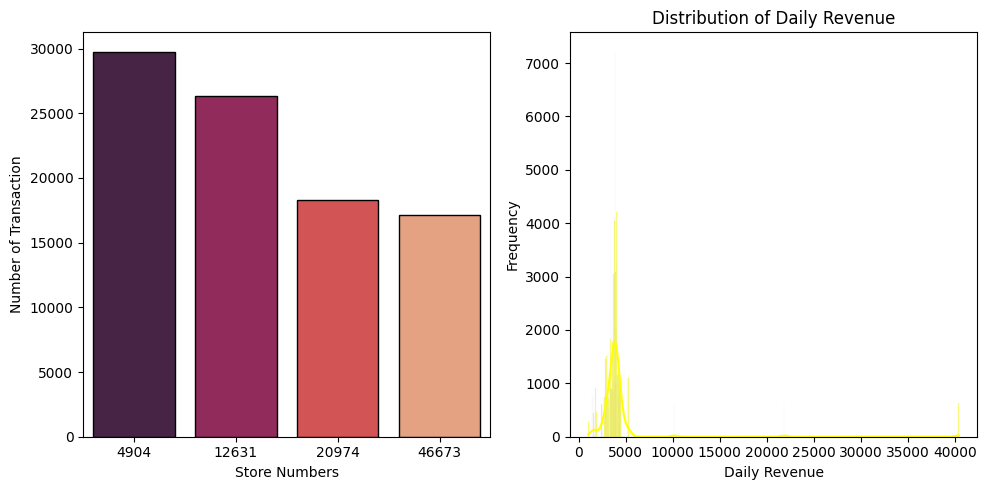

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x="STORE_NUMBER", palette="rocket", edgecolor='black')
plt.xlabel("Store Numbers")
plt.ylabel("Number of Transaction")

plt.subplot(1,2,2)
sns.histplot(data=data, x="Daily-Revenue", color="yellow", edgecolor="black", kde=True)
plt.xlabel("Daily Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Revenue")

plt.tight_layout()
plt.show()

In [ ]:
df5 = data.groupby(["STORE_NUMBER","date"])["Revenue"].sum().reset_index()
df5.rename(columns={'Revenue': 'Daily-Revenue For Each Store'}, inplace=True)
df5

,STORE_NUMBER,date,Daily-Revenue For Each Store
0,4904,2015-03-12,0.00
1,4904,2015-03-13,1739.97
2,4904,2015-03-14,692.18
3,4904,2015-03-15,1190.46
4,4904,2015-03-16,1433.65
...,...,...,...
391,46673,2015-06-11,635.97
392,46673,2015-06-12,567.52
393,46673,2015-06-13,422.30
394,46673,2015-06-14,586.06


In [ ]:
fig = px.line(df5,x="date",y="Daily-Revenue For Each Store",color="STORE_NUMBER",title="Daily-Revenue For Each Store Over Time")
fig.show()

In [ ]:
store_revenue = data.groupby("STORE_NUMBER")["Revenue"].sum().reset_index()
store_revenue

,STORE_NUMBER,Revenue
0,4904,179129.39
1,12631,100905.51
2,20974,77244.46
3,46673,65346.94


In [ ]:
fig = px.pie(store_revenue,names="STORE_NUMBER", values="Revenue", title="Contribution of Each Store to Total Revenue", hover_data=["Revenue"], labels={"Revenue": "Total Revenue"})
fig.show()

In [ ]:
df6 = data.groupby(["STORE_STATE","date"])["Revenue"].sum().reset_index()
df6

,STORE_STATE,date,Revenue
0,California,2015-03-05,691.50
1,California,2015-03-06,444.19
2,California,2015-03-07,288.05
3,California,2015-03-08,910.75
4,California,2015-03-09,647.23
...,...,...,...
201,New York,2015-06-11,2990.67
202,New York,2015-06-12,2192.71
203,New York,2015-06-13,1656.91
204,New York,2015-06-14,1511.93


In [ ]:
df7 = data.groupby("STORE_STATE")["Revenue"].sum().reset_index()
df7

,STORE_STATE,Revenue
0,California,244476.33
1,New York,178149.97


In [ ]:
fig = px.line(df6,x="date",y="Revenue",color="STORE_STATE",title="Daily-Revenue For Each State Over Time")
fig.show()

In [ ]:
fig = px.pie(df6,names="STORE_STATE",values="Revenue",title="Contribution of Each State to Total Revenue")
fig.show()

In [ ]:
df8 = data.groupby(["MenuItemId","MenuItemName"])["Revenue"].sum().reset_index()
df8

,MenuItemId,MenuItemName,Revenue
0,1,FtL/Ham,9652.12
1,2,Six/Ham,5960.37
2,3,FfB/Ham,314.78
3,4,fBd/Ham,78.33
4,5,Sld/Ham,17.50
...,...,...,...
277,10041,Sld/CChGua,14.50
278,10043,Wrp/CChGua,13.77
279,10063,#NAME?,277.25
280,10065,ad6/Guac,24.17


/tmp/ipython-input-1686178794.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




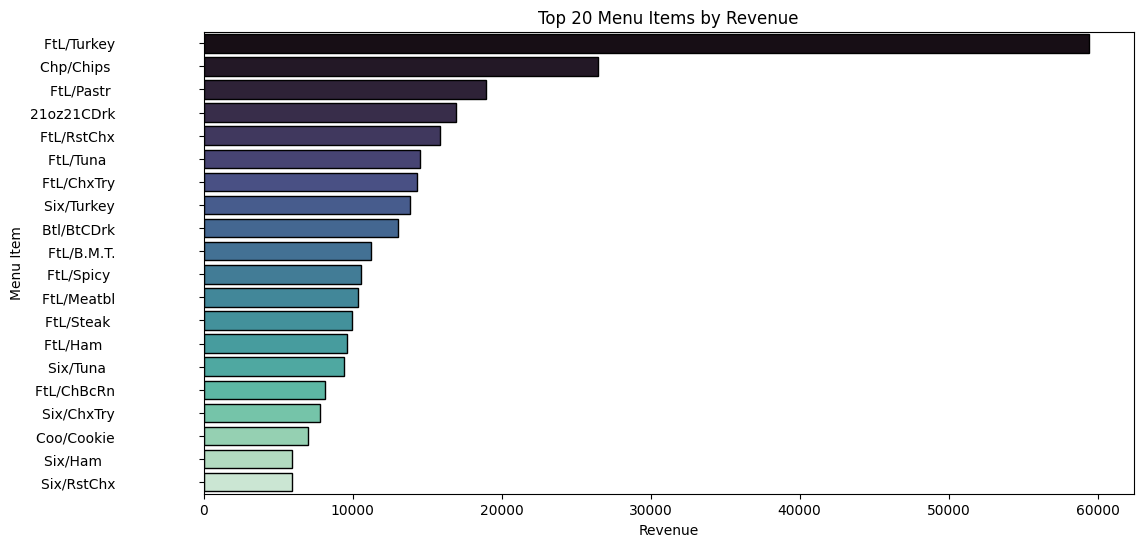

In [ ]:
top_items = df8.nlargest(20,"Revenue") # return as a new DataFrame
plt.figure(figsize=(12,6))
sns.barplot(top_items,x="Revenue",y="MenuItemName",palette="mako", edgecolor="black")
plt.xlabel("Revenue")
plt.ylabel("Menu Item")
plt.title("Top 20 Menu Items by Revenue")
plt.show()

In [ ]:
data

,MenuItemId,MenuItemName,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,date,MealLocation,TransactionId,STORE_NUMBER,STORE_STATE,STORE_TYPE,Revenue,day,month,Daily-Revenue
0,326,FtL/ChxStr,0.6975,7.75,0.00,7.75,1,2015-03-05,0,87,46673,California,Traditional,7.75,5,3,1558.79
1,280,21oz21CDrk,0.1530,1.70,0.00,1.70,1,2015-03-05,1,80,46673,California,Traditional,1.70,5,3,1558.79
2,8,Six/B.M.T.,0.3230,3.64,0.61,4.25,1,2015-03-05,0,98,12631,New York,Traditional,3.64,5,3,1558.79
3,91,Six/Veggie,0.3328,3.75,0.00,3.75,1,2015-03-05,0,45,12631,New York,Traditional,3.75,5,3,1558.79
4,564,ad6/Avocad,0.0443,0.50,0.00,0.50,1,2015-03-05,0,108,12631,New York,Traditional,0.50,5,3,1558.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,277,Chp/Chips,0.0000,0.95,0.25,1.20,1,2015-06-15,1,16106,4904,California,Traditional,0.95,15,6,5163.32
91427,44,Six/CCTrio,0.0000,4.00,0.00,4.00,1,2015-06-15,1,16016,4904,California,Traditional,4.00,15,6,5163.32
91428,43,FtL/CCTrio,0.4496,5.29,0.21,5.50,1,2015-06-15,0,16061,4904,California,Traditional,5.29,15,6,5163.32
91429,69,FtL/Spicy,0.4881,5.50,0.00,5.50,1,2015-06-15,0,12121,12631,New York,Traditional,5.50,15,6,5163.32


In [ ]:
data.dtypes

,0
MenuItemId,int64
MenuItemName,object
TaxAmount,float64
AdjustedPrice,float64
DiscountAmount,float64
Price,float64
Quantity,int64
date,datetime64[ns]
MealLocation,int64
TransactionId,int64


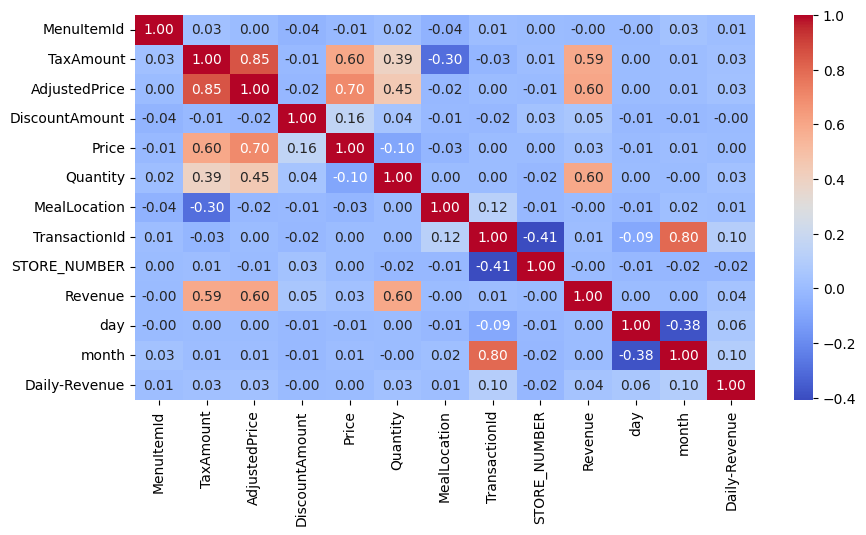

In [ ]:
corr = data.select_dtypes(np.number).corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [ ]:
daily_revenue1

,date,STORE_NUMBER,STORE_STATE,STORE_TYPE,Daily-Revenue,day,month,date_numeric
0,2015-03-05,12631,New York,Traditional,867.29,5,3,1425513600
1,2015-03-05,46673,California,Traditional,691.50,5,3,1425513600
2,2015-03-06,12631,New York,Traditional,975.46,6,3,1425600000
3,2015-03-06,20974,New York,Traditional,8.63,6,3,1425600000
4,2015-03-06,46673,California,Traditional,444.19,6,3,1425600000
...,...,...,...,...,...,...,...,...
391,2015-06-14,46673,California,Traditional,586.06,14,6,1434240000
392,2015-06-15,4904,California,Traditional,1283.25,15,6,1434326400
393,2015-06-15,12631,New York,Traditional,883.32,15,6,1434326400
394,2015-06-15,20974,New York,Traditional,1005.03,15,6,1434326400


In [ ]:
daily_revenue1.dtypes

,0
date,datetime64[ns]
STORE_NUMBER,int64
STORE_STATE,object
STORE_TYPE,object
Daily-Revenue,float64
day,int32
month,int32
date_numeric,int64


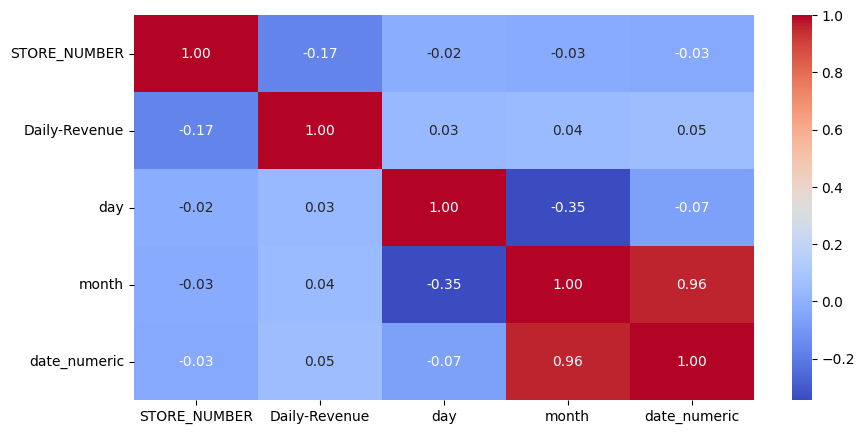

In [ ]:
corr = daily_revenue1.select_dtypes(np.number).corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()